In [1]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import os

# open file /run/secrets/postgres_pwd
with open(os.getenv("POSTGRES_PASSWORD_FILE"), 'r') as file:
    password = file.read().strip()

# Connect to your postgres DB
conn = psycopg2.connect(
    host="postgres",      # or IP address
    port=5432,             # default postgres port
    database=os.getenv("POSTGRES_DB"),
    user=os.getenv("POSTGRES_USER"),
    password="mysecretpassword"
)

In [2]:
sql = """
SELECT event_type, count(*) 
FROM customers 
GROUP BY event_type;
"""
df = pd.read_sql_query(sql, conn)

/tmp/ipykernel_4262/1533873943.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


In [3]:
df = df.set_index('event_type')

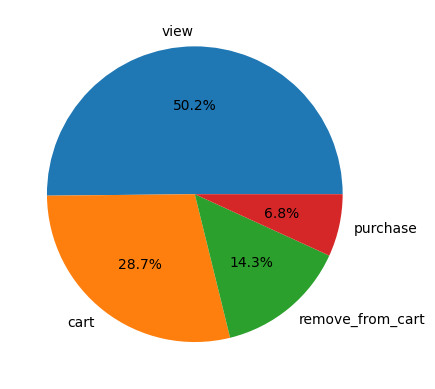

In [4]:
labels = df.index
sizes = df['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [5]:
# close the connection
conn.close()